In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

### Data preprocessing

In [2]:
df = pd.read_csv('sales_train_evaluation.csv')
df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [3]:
# Change ID to match with price dataframe
df['id'] = df['store_id'] + '-' + df['item_id']

# Set index
COLS_ITM = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
df.set_index(COLS_ITM, inplace = True)

# Exclude non-1st year columns
COLS_DATE = ['d_' + str(i) for i in range(1, 366)]
df = df[COLS_DATE]

df.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Calendar

In [4]:
# Import calendar
df_calendar = pd.read_csv('calendar.csv')
df_calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,29-01-11,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,30-01-11,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,31-01-11,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,01-02-11,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,02-02-11,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,15-06-16,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,16-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,17-06-16,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,18-06-16,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [5]:
dict_week = dict(zip(df_calendar.d.values, df_calendar.wm_yr_wk.values))

### Price
> Create a pricing matrix M(n, p) with n = sku_id and p = week

In [6]:
# Import Pricing
df_price = pd.read_csv('sell_prices.csv')

# Stock keeping unit (SKU) Index
df_price['item_store_id'] = df_price['store_id'] + '-' + df_price['item_id']

# Pricing
df_price = df_price.pivot(index = 'item_store_id', columns = 'wm_yr_wk', values = 'sell_price').fillna(0)

# Matrix from pivot
matrix_price = df_price.to_numpy()

# Dict Matrix Index
pr_n = dict(zip(df_price.index, range(len(df_price.index))))
pr_p = dict(zip(df_price.columns, range(len(df_price.columns))))
df_price.head()

wm_yr_wk,11101,11102,11103,11104,11105,11106,11107,11108,11109,11110,...,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
item_store_id,,,,,,,,,,,,,,,,,,,,,
CA_1-FOODS_1_001,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24
CA_1-FOODS_1_002,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,...,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48
CA_1-FOODS_1_003,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,...,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23
CA_1-FOODS_1_004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96
CA_1-FOODS_1_005,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,...,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54


### Statistical Analysis

In [7]:
# Mean 
df['mean'] = df[COLS_DATE].mean(axis = 1)
# Standard
df['std'] = df[COLS_DATE].std(axis = 1)

# Remove items not sold during the first year
print("{:,} records for the full scope".format(len(df)))
df = df[df['mean'] > 0]
print("{:,} records after filter".format(len(df)))
df.reset_index(inplace = True)
df.head()

30,490 records for the full scope
17,055 records after filter


C:\Users\User\AppData\Local\Temp/ipykernel_1320/384252174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df[COLS_DATE].mean(axis = 1)
C:\Users\User\AppData\Local\Temp/ipykernel_1320/384252174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[COLS_DATE].std(axis = 1)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,0,1,1,0,0,0.175342,0.459270
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,8,1,3,0,1,2,3,1.282192,1.504512
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0.794521,1.543854
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,20,26,0,9,14,0,8,18,6.854795,8.556423
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,1,0,0,3,0,1.816438,2.486613


### Turnover, Sales Units
> Turnover = Price x Volume

In [8]:
# Total Units
df['units'] = df[COLS_DATE].sum(axis = 1)
# Turnover = Units x Price
df['TO'] = 0
for col in COLS_DATE:
    df['TO'] = df['TO'] + df[col]*df[['id', col]].apply(
    lambda t: matrix_price[pr_n[t['id']], pr_p[dict_week[col]]], axis = 1)
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,1,0,0,0.175342,0.459270,64,254.08
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,2,3,1.282192,1.504512,468,2031.12
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0.794521,1.543854,290,800.70
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,9,14,0,8,18,6.854795,8.556423,2502,1237.92
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,1,0,0,3,0,1.816438,2.486613,663,1151.04


### Coefficient of Variation

In [9]:
df['CV'] = df['std']/df['mean']
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO,CV
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0.175342,0.459270,64,254.08,2.619273
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,2,3,1.282192,1.504512,468,2031.12,1.173391
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0.794521,1.543854,290,800.70,1.943127
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,9,14,0,8,18,6.854795,8.556423,2502,1237.92,1.248239
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,3,0,1.816438,2.486613,663,1151.04,1.368950


---
### Segmentation
#### ABC Analysis + Demand Variability

> at SKU Level

In [10]:
# ABC SKU-LEVEL
df_abc = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_abc = df_abc.groupby(['item_id', 'dept_id', 'cat_id']).sum()

# Calculate mean and standard deviation
# Mean
df_abc['mean'] = df_abc[COLS_DATE].mean(axis = 1)
# Filter out the reference without sales
df_abc = df_abc[df_abc['mean'] > 0]
# Standard
df_abc['std'] = df_abc[COLS_DATE].std(axis = 1)
# Coefficient of Variation
df_abc['CV'] = df_abc['std']/df_abc['mean']
df_abc.reset_index(inplace = True)
df_abc

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,...,d_361,d_362,d_363,d_364,d_365,units,TO,mean,std,CV
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,1,3,3,1,6,806,3199.82,2.208219,3.087628,1.398244
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,...,26,21,17,10,23,6522,28165.49,17.868493,7.228167,0.404520
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,8,4,7,14,14,3125,8397.00,8.561644,7.131393,0.832947
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,...,77,116,49,104,86,20989,10242.36,57.504110,24.409130,0.424476
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,...,9,4,2,14,18,3300,5584.77,9.041096,5.282249,0.584249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,HOBBIES_2_142,HOBBIES_2,HOBBIES,8,6,5,5,9,14,0,...,19,24,22,8,24,5966,1326.94,16.345205,17.161523,1.049942
313,HOBBIES_2_143,HOBBIES_2,HOBBIES,0,0,0,2,0,0,0,...,0,0,1,0,0,262,307.44,0.717808,1.615460,2.250545
314,HOBBIES_2_145,HOBBIES_2,HOBBIES,0,0,0,0,0,0,0,...,0,3,5,7,6,580,1495.30,1.589041,2.311198,1.454461
315,HOBBIES_2_146,HOBBIES_2,HOBBIES,0,5,2,0,0,0,1,...,1,2,0,2,6,901,1774.97,2.468493,2.313890,0.937369


In [11]:
# Normality Test
df_abc['Normality_p'] = df_abc[COLS_DATE].apply(lambda row: stats.shapiro(row)[1], axis = 1)
alpha = 0.001
df_abc['Not_Normal'] = df_abc['Normality_p'] < alpha
df_abc

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,...,d_363,d_364,d_365,units,TO,mean,std,CV,Normality_p,Not_Normal
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,3,1,6,806,3199.82,2.208219,3.087628,1.398244,6.009899e-25,True
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,...,17,10,23,6522,28165.49,17.868493,7.228167,0.404520,4.168996e-06,True
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,7,14,14,3125,8397.00,8.561644,7.131393,0.832947,4.358272e-13,True
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,...,49,104,86,20989,10242.36,57.504110,24.409130,0.424476,1.916061e-01,False
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,...,2,14,18,3300,5584.77,9.041096,5.282249,0.584249,1.485240e-09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,HOBBIES_2_142,HOBBIES_2,HOBBIES,8,6,5,5,9,14,0,...,22,8,24,5966,1326.94,16.345205,17.161523,1.049942,1.047790e-24,True
313,HOBBIES_2_143,HOBBIES_2,HOBBIES,0,0,0,2,0,0,0,...,1,0,0,262,307.44,0.717808,1.615460,2.250545,6.887677e-31,True
314,HOBBIES_2_145,HOBBIES_2,HOBBIES,0,0,0,0,0,0,0,...,5,7,6,580,1495.30,1.589041,2.311198,1.454461,5.367860e-24,True
315,HOBBIES_2_146,HOBBIES_2,HOBBIES,0,5,2,0,0,0,1,...,0,2,6,901,1774.97,2.468493,2.313890,0.937369,1.373240e-16,True


In [12]:
df_abc = df_abc.drop(COLS_DATE, axis =1).copy()
df_abc['TO%'] = (100*df_abc['TO']/df_abc['TO'].sum())
# Sort
df_abc.sort_values(['TO%'], ascending = False, inplace = True, ignore_index=True)
df_abc['TO%_CS'] = df_abc['TO%'].cumsum()
df_abc

,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622
...,...,...,...,...,...,...,...,...,...,...,...,...
312,HOBBIES_1_212,HOBBIES_1,HOBBIES,39,291.42,0.106849,0.318103,2.977113,6.970425e-34,True,0.010172,99.976133
313,HOBBIES_1_019,HOBBIES_1,HOBBIES,559,279.50,1.531507,5.609276,3.662586,7.712165e-35,True,0.009756,99.985889
314,HOBBIES_1_261,HOBBIES_1,HOBBIES,469,215.86,1.284932,4.353339,3.387993,2.907841e-34,True,0.007534,99.993424
315,HOBBIES_2_052,HOBBIES_2,HOBBIES,65,160.55,0.178082,0.674139,3.785550,4.610317e-35,True,0.005604,99.999028


In [13]:
# A, B, C on SKU number
n_sku = len(df_abc)
n_a, n_b = int(0.05*n_sku), int(0.5*n_sku)
df_abc['SKU_ID'] = pd.Series(range(1, len(df_abc))).astype(int)
df_abc['SKU_%'] = (100 * pd.Series(range(1, len(df_abc)))/len(df_abc))
# Categorize into ABC
df_abc['ABC'] = pd.Series(range(len(df_abc))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C')

# A, B, C on turnover
to_a, to_b = df_abc[df_abc['SKU_ID'] == n_a]['TO%'].max(), df_abc[df_abc['SKU_ID'] == n_b]['TO%'].max()

print("{:,} unique SKU".format(len(df_abc)))
df_abc.head()

317 unique SKU


,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457,A
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915,A
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372,A
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830,A
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287,A


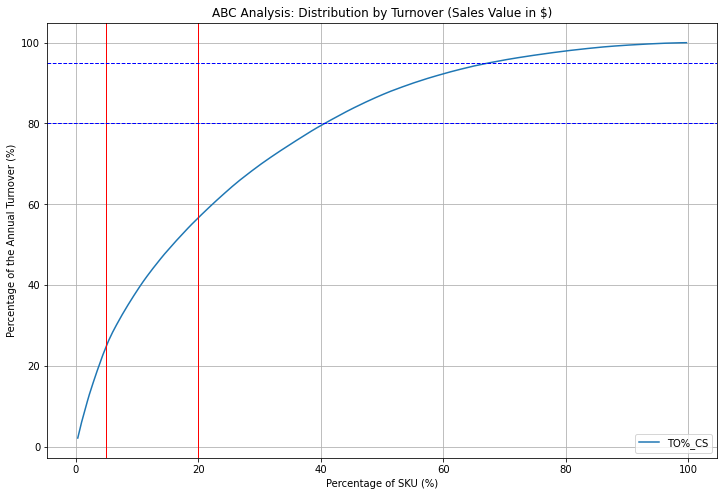

In [14]:
# Distribution by Value
ax = plt.gca()
df_abc.plot(figsize=(12, 8), x='SKU_%', y='TO%_CS', ax =ax, grid = True)

# 20%, 50% of SKU Number
ax.axvline(5 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of Annual Turnover
ax.axhline(80 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of SKU (%)')
plt.ylabel('Percentage of the Annual Turnover (%)')
plt.title('ABC Analysis: Distribution by Turnover (Sales Value in $)')
plt.show()

### Segmentation by Demand Variability

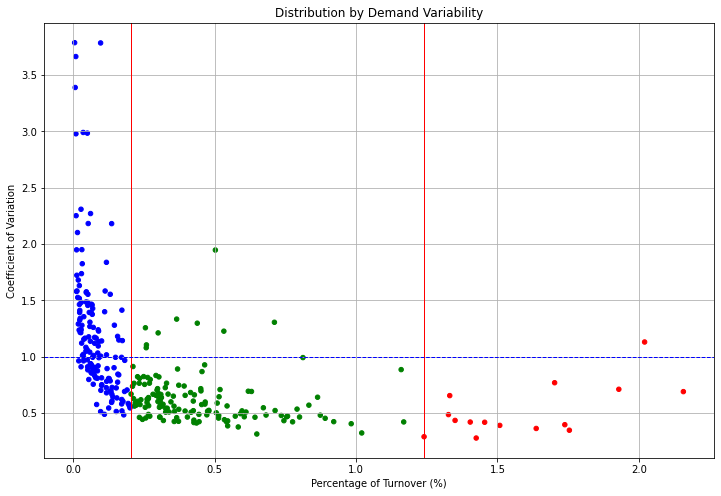

In [15]:
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove outliers
df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# A, B and C
ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)

plt.xlabel('Percentage of Turnover (%)')
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()

### Distribution for Important Products with high variability

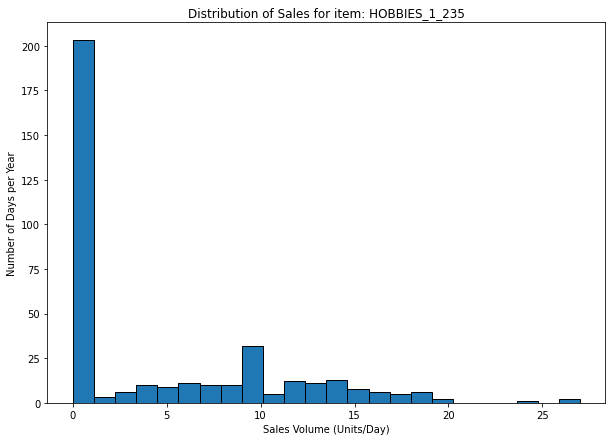

In [16]:
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item A
item_high = 'HOBBIES_1_235'
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

### Distribution for Important Products with low variability


In [17]:
df_abc[(df_abc['CV']<0.3) & (df_abc['TO%']>0.25)]


,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
9,HOBBIES_1_323,HOBBIES_1,HOBBIES,8270,40822.60,22.657534,6.291498,0.277678,0.021935,False,1.424885,17.325631,10.0,3.154574,A
14,HOBBIES_1_337,HOBBIES_1,HOBBIES,9685,35543.95,26.534247,7.677715,0.289351,0.003679,False,1.240638,23.978597,15.0,4.731861,A


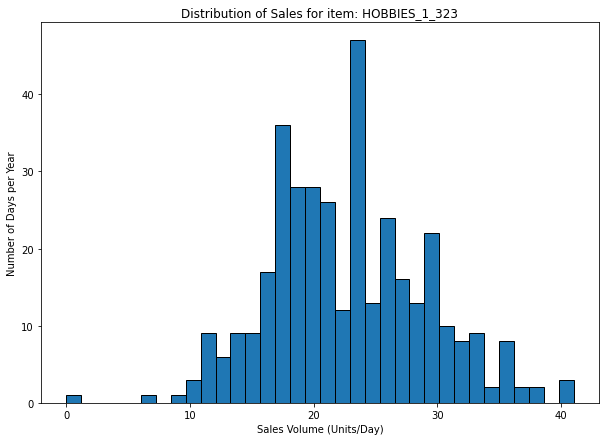

In [18]:
# ABC SKU-LEVEL
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item A
item_high = 'HOBBIES_1_323'
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

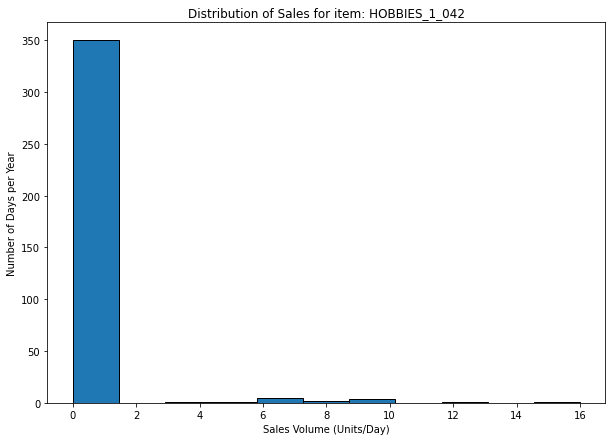

In [19]:
# ABC SKU-LEVEL
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item A
item_high = 'HOBBIES_1_042'
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

### Normality Test

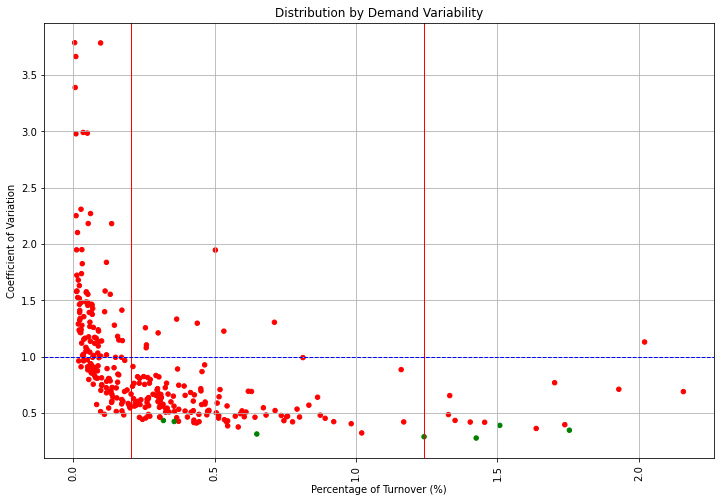

In [20]:
ax = plt.gca()
colors = {False:'green', True:'red'}
# Remove Outliers
df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['Not_Normal'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()